In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

import interactions

[-1.35366722 -1.3536517  -1.3536517  -1.35363193 -1.35363193 -1.35358112
 -1.35358112 -1.35352607 -1.35352607 -1.35343996]


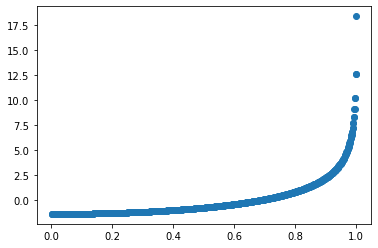

In [2]:
N = 1000
alpha = 0.9

Jbase = interactions.powerlaw_pbc(N, alpha)
# Jbase = interactions.shift(Jbase, 0.)
# Jbase = interactions.rescale(Jbase)

vals = eigh(Jbase, eigvals_only=True)

print(vals[:10])

plt.plot(np.arange(1, len(vals) + 1) / N, vals, lw=0, marker="o")
plt.show()

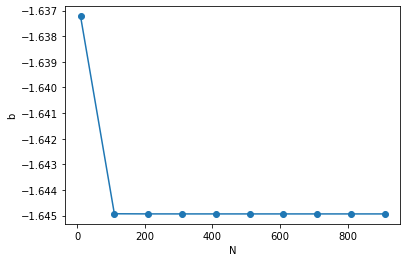

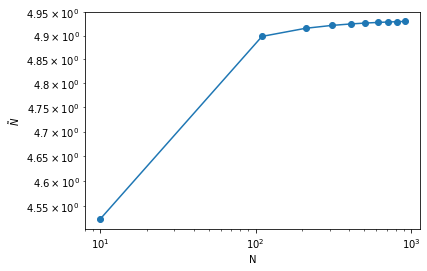

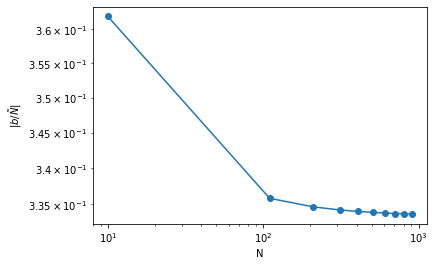

In [3]:
alpha = 2.0

Ns = np.arange(10, 1_000, 100)
bs = []
Ss = []

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase, b = interactions.shift(Jbase, 0.0, return_shift=True)
    Jbase, S = interactions.rescale(Jbase, return_scale=True)
    bs.append(b)
    Ss.append(S)

bs = np.array(bs)
Ss = np.array(Ss)

plt.plot(Ns, bs, marker="o")
plt.ylabel("b")
plt.xlabel("N")
plt.show()

plt.plot(Ns, Ss, marker="o")
plt.ylabel(r"$\tilde{N}$")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("N")
plt.show()

plt.plot(Ns, np.abs(bs / Ss), marker="o")
plt.ylabel(r"$|b / \tilde{N}|$")
plt.xlabel("N")
plt.yscale("log")
plt.xscale("log")
plt.show()